In [ ]:
'''
# install required system dependencies
!apt-get install -y xvfb x11-utils
# install required python dependencies (might need to install additional gym extras depending)
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*
!pip install pyvirtualdisplay==0.2.*
'''

In [ ]:
''' Installing cuda without openGL on Debian 9 stretch. Basically Xvfb doesn't play nice with Nvidia's openGL installation, 
so you have to install it with --no-opengl-libs flags. First, just use the driver recommended at the start up screen of controlla-1-image 
with --no-opengl-libs flag added
    a. Follow unbuntu 16.04 (https://developer.nvidia.com/cuda-10.0-download-archive target_os=Linux&target_arch=x86_64&target_distro=Ubuntu&target_version=1604&target_type=runfilelocal)
        1. wget https://developer.nvidia.com/compute/cuda/10.0/Prod/local_installers/cuda_10.0.130_410.48_linux.run
        2. sudo sh cuda_10.0.130_410.48_linux.run --no-opengl-libs
    b. Adapt script from https://gist.github.com/8enmann/931ec2a9dc45fde871d2139a7d1f2d78 to remove old install
        1. sudo apt-get --purge remove nvidia-*
        2. sudo nvidia-uninstall
    c. Please make sure that PATH contains /usr/local/cuda/bin and LD_LIBRARY_PATH contains /usr/local/cuda/lib64
        1.   export PATH=$PATH:/usr/local/cuda-10.0/bin
        2.   export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda-10.0/lib64
    d. Extra things needed to be moved to the right dirs (https://docs.nvidia.com/deeplearning/cudnn/install-guide/index.html section 2.3 to get tar file for Nvidia toolkit)
        1. sudo cp cuda/include/cudnn*.h /usr/local/cuda/include 
        2. sudo cp -P cuda/lib64/libcudnn* /usr/local/cuda/lib64 
        3. sudo chmod a+r /usr/local/cuda/include/cudnn*.h /usr/local/cuda/lib64/libcudnn*
'''

In [1]:
import deluca
import gym
import gnwrapper
import jax
from deluca.envs import Pendulum
from deluca.agents import ILQR
from pyvirtualdisplay import Display

/home/alexjyu/miniconda3/envs/ealstm/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    # plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.title("%s | Step: %d %s" % (type(env).__name__,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [3]:
def loop(context, i):
    env, agent = context
    control = agent(env.state)
    _, reward, _, _ = env.step(control)
    show_state(env, step=i)
    return (env, agent), reward

In [7]:
# ILQR
agent = ILQR()
agent.train(Pendulum(), 30)

initial cost:176.80212
(iLQR): t = 0, r = 9, c = 166.753173828125, alpha = 0.010307436808943748
(iLQR): t = 3, r = 33, c = 162.36074829101562, alpha = 0.004808494355529547


(DeviceArray(162.36075, dtype=float32),
 ['(iLQR): t = 0, r = 9, c = 166.753173828125, alpha = 0.010307436808943748',
  '(iLQR): t = 3, r = 33, c = 162.36074829101562, alpha = 0.004808494355529547'])

In [5]:
# needed to connect to "fake" monitor (not actually used)
display_dummy = Display(visible=False, size=(1400, 900))
display_dummy.start()

------------------------------------------
FullArgSpec(args=['self', 'args', 'bufsize', 'executable', 'stdin', 'stdout', 'stderr', 'preexec_fn', 'close_fds', 'shell', 'cwd', 'env', 'universal_newlines', 'startupinfo', 'creationflags', 'restore_signals', 'start_new_session', 'pass_fds'], varargs=None, varkw=None, defaults=(-1, None, None, None, None, None, True, False, None, None, None, None, 0, True, False, ()), kwonlyargs=['encoding', 'errors', 'text'], kwonlydefaults={'encoding': None, 'errors': None, 'text': None}, annotations={})
self.cwd:None
self.env:None
cmd:['Xvfb', '-help']
3
7
------------------------------------------
FullArgSpec(args=['self', 'args', 'bufsize', 'executable', 'stdin', 'stdout', 'stderr', 'preexec_fn', 'close_fds', 'shell', 'cwd', 'env', 'universal_newlines', 'startupinfo', 'creationflags', 'restore_signals', 'start_new_session', 'pass_fds'], varargs=None, varkw=None, defaults=(-1, None, None, None, None, None, True, False, None, None, None, None, 0, True, Fa

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1243'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1243'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

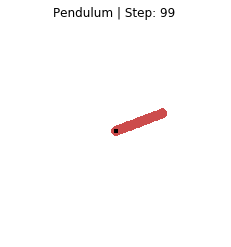

reward_forloop = 397.64563


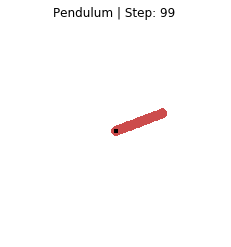

In [8]:
# for loop version
T = 100
env = Pendulum()
# env = gnwrapper.Animation(gym.make('CartPole-v1'))
# env = gnwrapper.Animation(Pendulum())
# env = gnwrapper.LoopAnimation(Pendulum())
# env = gnwrapper.Monitor(env, directory="./run0") 
print(env.reset())
reward = 0
for i in range(T):
    (env, agent), r = loop((env, agent), i)
    reward += r
# env.reset()
# env.display()
reward_forloop = reward
print('reward_forloop = ' + str(reward_forloop))